In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flights_df = pd.read_csv('flights.csv')
flights_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [3]:
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [4]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 41.1+ MB


In [5]:
flights_df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,336776.000000,327346.000000,336776.000000,328521.000000,328521.000000
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,1971.923620,150.686460,1039.912604,13.173544,31.755501
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,1632.471938,93.688305,733.233033,4.894426,18.230997
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,1496.000000,129.000000,872.000000,14.000000,31.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,8500.000000,695.000000,4983.000000,24.000000,59.000000


In [6]:
planes_df = pd.read_csv('planes.csv')
planes_df

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


# Question - 1

How many total number of days does the flights table cover?

In [7]:
sum(flights_df['day'])

5291016

#The total number of days covered by the flights table are 5291016

# Question - 2

how many departure cities (not airports) does the flights database cover?

In [8]:
flights_df['actual_dep_time'] = flights_df['dep_time'] - flights_df['dep_delay']
flights_df['actual_arr_time'] = flights_df['arr_time'] - flights_df['arr_delay']
flights_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,actual_dep_time,actual_arr_time
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,515.0,819.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,529.0,830.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,540.0,890.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,545.0,1022.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,560.0,837.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN,NaN,NaN
336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN,NaN,NaN
336773,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN,NaN,NaN
336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN,NaN,NaN


In [9]:
def ratio(dep_delay):
    if dep_delay > 0:
        return 'Late'
    elif dep_delay == 0:
        return 'OnTIme'
    else:
        return 'OnTime'

def ratio1(arr_delay):
    if arr_delay > 0:
        return 'Late'
    elif arr_delay == 0:
        return 'OnTime'
    else:
        return 'OnTime'
    

flights_df['dep_status'] = flights_df['dep_delay'].apply(ratio)
flights_df['arr_status'] = flights_df['arr_delay'].apply(ratio)
flights_df.head(10)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,actual_dep_time,actual_arr_time,dep_status,arr_status
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,515.0,819.0,Late,Late
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,529.0,830.0,Late,Late
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,540.0,890.0,Late,Late
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,545.0,1022.0,OnTime,OnTime
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,560.0,837.0,OnTime,OnTime
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0,558.0,728.0,OnTime,Late
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0,560.0,894.0,OnTime,Late
7,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0,560.0,723.0,OnTime,OnTime
8,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0,560.0,846.0,OnTime,OnTime
9,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0,560.0,745.0,OnTime,Late


In [10]:
flights_new_df = flights_df.fillna(value=0)
flights_new_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,actual_dep_time,actual_arr_time,dep_status,arr_status
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,515.0,819.0,Late,Late
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,529.0,830.0,Late,Late
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,540.0,890.0,Late,Late
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,545.0,1022.0,OnTime,OnTime
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,560.0,837.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,0.0,0.0,0.0,0.0,9E,0,3393,JFK,DCA,0.0,213,0.0,0.0,0.0,0.0,OnTime,OnTime
336772,2013,9,30,0.0,0.0,0.0,0.0,9E,0,3525,LGA,SYR,0.0,198,0.0,0.0,0.0,0.0,OnTime,OnTime
336773,2013,9,30,0.0,0.0,0.0,0.0,MQ,N535MQ,3461,LGA,BNA,0.0,764,0.0,0.0,0.0,0.0,OnTime,OnTime
336774,2013,9,30,0.0,0.0,0.0,0.0,MQ,N511MQ,3572,LGA,CLE,0.0,419,0.0,0.0,0.0,0.0,OnTime,OnTime


In [11]:
flights_new_df['dep_time'] = flights_new_df.dep_time[~flights_new_df.dep_time.isna()].astype(np.int64).apply('{:0>4}'.format)
flights_new_df['dep_time'] = pd.to_timedelta(flights_new_df.dep_time.str[:2]+':'+ flights_new_df.dep_time.str[2:]+':00')


flights_new_df['arr_time'] = flights_new_df.arr_time[~flights_new_df.arr_time.isna()].astype(np.int64).apply('{:0>4}'.format)
flights_new_df['arr_time'] = pd.to_timedelta(flights_new_df.arr_time.str[:2]+':'+ flights_new_df.arr_time.str[2:]+':00')

In [12]:
flights_new_df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,actual_dep_time,actual_arr_time,dep_status,arr_status
0,2013,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,515.0,819.0,Late,Late
1,2013,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,529.0,830.0,Late,Late
2,2013,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,540.0,890.0,Late,Late
3,2013,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,545.0,1022.0,OnTime,OnTime
4,2013,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,560.0,837.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3393,JFK,DCA,0.0,213,0.0,0.0,0.0,0.0,OnTime,OnTime
336772,2013,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3525,LGA,SYR,0.0,198,0.0,0.0,0.0,0.0,OnTime,OnTime
336773,2013,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N535MQ,3461,LGA,BNA,0.0,764,0.0,0.0,0.0,0.0,OnTime,OnTime
336774,2013,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N511MQ,3572,LGA,CLE,0.0,419,0.0,0.0,0.0,0.0,OnTime,OnTime


In [13]:
flights_new_df.drop('year',axis=1,inplace=True)
flights_new_df.drop('hour',axis=1,inplace=True)
flights_new_df.drop('minute',axis=1,inplace=True)

In [14]:
flights_new_df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,actual_dep_time,actual_arr_time,dep_status,arr_status
0,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,515.0,819.0,Late,Late
1,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,529.0,830.0,Late,Late
2,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,540.0,890.0,Late,Late
3,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,545.0,1022.0,OnTime,OnTime
4,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,560.0,837.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3393,JFK,DCA,0.0,213,0.0,0.0,OnTime,OnTime
336772,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3525,LGA,SYR,0.0,198,0.0,0.0,OnTime,OnTime
336773,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N535MQ,3461,LGA,BNA,0.0,764,0.0,0.0,OnTime,OnTime
336774,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N511MQ,3572,LGA,CLE,0.0,419,0.0,0.0,OnTime,OnTime


In [31]:
flights_deepcopy_df = flights_new_df.copy()
flights_deepcopy_df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,actual_dep_time,actual_arr_time,dep_status,arr_status
0,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,515.0,819.0,Late,Late
1,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,529.0,830.0,Late,Late
2,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,540.0,890.0,Late,Late
3,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,545.0,1022.0,OnTime,OnTime
4,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,560.0,837.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3393,JFK,DCA,0.0,213,0.0,0.0,OnTime,OnTime
336772,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3525,LGA,SYR,0.0,198,0.0,0.0,OnTime,OnTime
336773,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N535MQ,3461,LGA,BNA,0.0,764,0.0,0.0,OnTime,OnTime
336774,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N511MQ,3572,LGA,CLE,0.0,419,0.0,0.0,OnTime,OnTime


In [16]:
flights_deepcopy_df = flights_deepcopy_df.rename({'dest':'IATA_CODE'},axis = 1)
flights_deepcopy_df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,IATA_CODE,air_time,distance,actual_dep_time,actual_arr_time,dep_status,arr_status
0,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,515.0,819.0,Late,Late
1,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,529.0,830.0,Late,Late
2,1,1,0 days 05:42:00,2.0,0 days 09:23:00,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,540.0,890.0,Late,Late
3,1,1,0 days 05:44:00,-1.0,0 days 10:04:00,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,545.0,1022.0,OnTime,OnTime
4,1,1,0 days 05:54:00,-6.0,0 days 08:12:00,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,560.0,837.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3393,JFK,DCA,0.0,213,0.0,0.0,OnTime,OnTime
336772,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,9E,0,3525,LGA,SYR,0.0,198,0.0,0.0,OnTime,OnTime
336773,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N535MQ,3461,LGA,BNA,0.0,764,0.0,0.0,OnTime,OnTime
336774,9,30,0 days 00:00:00,0.0,0 days 00:00:00,0.0,MQ,N511MQ,3572,LGA,CLE,0.0,419,0.0,0.0,OnTime,OnTime


In [17]:
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [18]:
flights_deepcopy_df = pd.merge(flights_deepcopy_df,airports_df, on=['IATA_CODE'],how='inner')
flights_deepcopy_df

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,...,actual_dep_time,actual_arr_time,dep_status,arr_status,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,1,1,0 days 05:17:00,2.0,0 days 08:30:00,11.0,UA,N14228,1545,EWR,...,515.0,819.0,Late,Late,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
1,1,1,0 days 05:33:00,4.0,0 days 08:50:00,20.0,UA,N24211,1714,LGA,...,529.0,830.0,Late,Late,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
2,1,1,0 days 06:23:00,-4.0,0 days 09:33:00,1.0,UA,N459UA,496,LGA,...,627.0,932.0,OnTime,Late,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
3,1,1,0 days 07:28:00,-4.0,0 days 10:41:00,3.0,UA,N488UA,473,LGA,...,732.0,1038.0,OnTime,Late,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
4,1,1,0 days 07:39:00,0.0,0 days 11:04:00,26.0,UA,N37408,1479,EWR,...,739.0,1078.0,OnTIme,Late,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,8,3,0 days 16:15:00,0.0,0 days 20:03:00,10.0,UA,N572UA,887,EWR,...,1615.0,1993.0,OnTIme,Late,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
336772,8,10,0 days 16:13:00,-2.0,0 days 19:22:00,-31.0,UA,N559UA,887,EWR,...,1615.0,1953.0,OnTime,OnTime,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
336773,8,17,0 days 17:40:00,75.0,0 days 20:42:00,39.0,UA,N528UA,887,EWR,...,1665.0,2003.0,Late,Late,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
336774,8,24,0 days 16:33:00,8.0,0 days 19:59:00,-4.0,UA,N534UA,887,EWR,...,1625.0,1963.0,Late,OnTime,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [19]:
city_dest_df = flights_deepcopy_df.groupby(["CITY"]).size().reset_index(name='Number')
city_dest_df

,CITY,Number
0,Aguadilla,896
1,Akron,864
2,Albany,439
3,Albuquerque,254
4,Anchorage,8
...,...,...
96,Traverse City,101
97,Tulsa,315
98,West Palm Beach,6554
99,Wilmington,110


In [20]:
city_dest_df['CITY'].count()

101

#The total number of departure cities are covered by the flight table is 101

# Question - 3

what is the relationship between flights and planes tables?

In [21]:
planes_df = planes_df.fillna(value=0)
planes_df

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0.0,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,0.0,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0.0,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,0.0,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,0.0,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet


In [22]:
df = pd.merge(planes_df,flights_new_df, on=['tailnum'],how='inner')
df

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine,month,...,carrier,flight,origin,dest,air_time,distance,actual_dep_time,actual_arr_time,dep_status,arr_status
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan,1,...,EV,4560,EWR,PIT,60.0,319,630.0,800.0,OnTime,Late
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan,1,...,EV,4269,EWR,CHS,99.0,628,1072.0,1280.0,Late,Late
2,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan,1,...,EV,4667,EWR,MSP,175.0,1008,1580.0,1784.0,Late,Late
3,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan,1,...,EV,4334,EWR,CMH,81.0,463,634.0,822.0,OnTime,OnTime
4,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,0.0,Turbo-fan,1,...,EV,4298,EWR,MCI,171.0,1092,1120.0,1336.0,OnTime,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284165,N999DN,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet,9,...,DL,1499,LGA,ATL,103.0,762,1660.0,1937.0,OnTime,OnTime
284166,N999DN,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet,9,...,DL,461,LGA,ATL,105.0,762,560.0,827.0,OnTime,OnTime
284167,N999DN,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet,9,...,DL,1847,LGA,ATL,116.0,762,960.0,1277.0,OnTime,Late
284168,N999DN,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,0.0,Turbo-jet,9,...,DL,1847,LGA,ATL,113.0,762,960.0,1237.0,OnTime,Late


In [23]:
df.drop('seats',axis=1,inplace=True)
df.drop('speed',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)
df.drop('engines',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('day',axis=1,inplace=True)

In [24]:
df.corr()

,dep_delay,arr_delay,flight,air_time,distance,actual_dep_time,actual_arr_time
dep_delay,1.000000,0.911414,0.059929,-0.022564,-0.024142,0.183998,-0.044364
arr_delay,0.911414,1.000000,0.067491,-0.033604,-0.063018,0.157333,-0.057095
flight,0.059929,0.067491,1.000000,-0.459280,-0.464365,-0.008114,-0.022991
air_time,-0.022564,-0.033604,-0.459280,1.000000,0.974223,0.049922,0.126373
distance,-0.024142,-0.063018,-0.464365,0.974223,1.000000,0.011277,0.069101
actual_dep_time,0.183998,0.157333,-0.008114,0.049922,0.011277,1.000000,0.659666
actual_arr_time,-0.044364,-0.057095,-0.022991,0.126373,0.069101,0.659666,1.000000


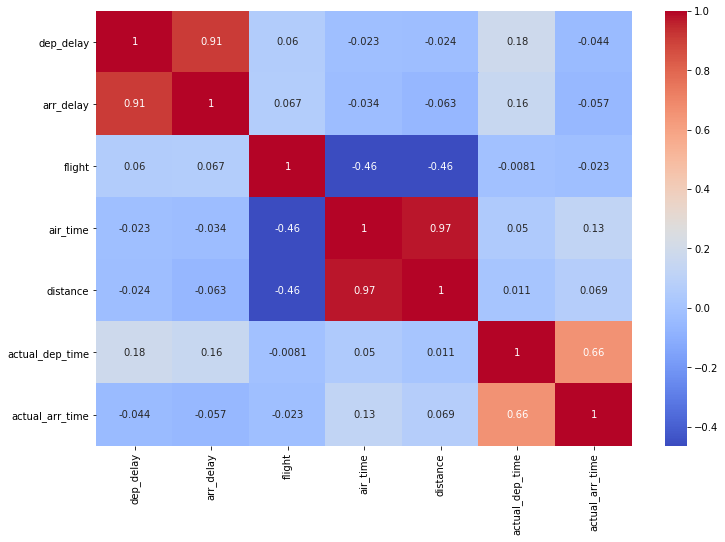

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# Question - 4

which airplane manufacturer incurred the most delays in the analysis period?

In [53]:
depAir = df.loc[df['dep_status'] == 'Late'].groupby(['manufacturer','origin','dep_status'])['dep_status'].count().unstack('dep_status')
depAir

dep_status                      Late
manufacturer           origin       
AGUSTA SPA             JFK        18
AIRBUS                 EWR      3101
                       JFK     11506
                       LGA      3419
AIRBUS INDUSTRIE       EWR      6112
...                              ...
ROBINSON HELICOPTER CO LGA        26
SIKORSKY               JFK        11
STEWART MACO           EWR         1
                       JFK         7
                       LGA         6

[74 rows x 1 columns]

In [47]:
depAir['Late'].nlargest(1)

manufacturer  origin
BOEING        EWR       21110
Name: Late, dtype: int64

In [37]:
arrAir = df.loc[df['arr_status'] == 'Late'].groupby(['manufacturer','origin','arr_status'])['arr_status'].count().unstack('arr_status')
arrAir

arr_status                      Late
manufacturer           origin       
AGUSTA SPA             JFK        17
AIRBUS                 EWR      3500
                       JFK     11714
                       LGA      4118
AIRBUS INDUSTRIE       EWR      5735
...                              ...
ROBINSON HELICOPTER CO LGA        23
SIKORSKY               JFK        11
STEWART MACO           EWR         2
                       JFK         7
                       LGA         8

[76 rows x 1 columns]

In [50]:
arrAir['Late'].nlargest(1)

manufacturer  origin
EMBRAER       EWR       20598
Name: Late, dtype: int64

#BOEING, the airplane manufacturer incurred the most delays in the analysis period

# Question - 5

which are the two most connected cities?

In [26]:
busyAir = flights_deepcopy_df.groupby(['origin','CITY'])['CITY'].count().reset_index(name='Number')
busyAir

,origin,CITY,Number
0,EWR,Aguadilla,297
1,EWR,Albany,439
2,EWR,Anchorage,8
3,EWR,Arlington,1719
4,EWR,Asheville,265
...,...,...,...
211,LGA,Syracuse,293
212,LGA,Tampa,2145
213,LGA,Traverse City,77
214,LGA,West Palm Beach,2464


In [27]:
buzAir = flights_deepcopy_df.groupby(['origin'])['origin'].count()
buzAir

origin
EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

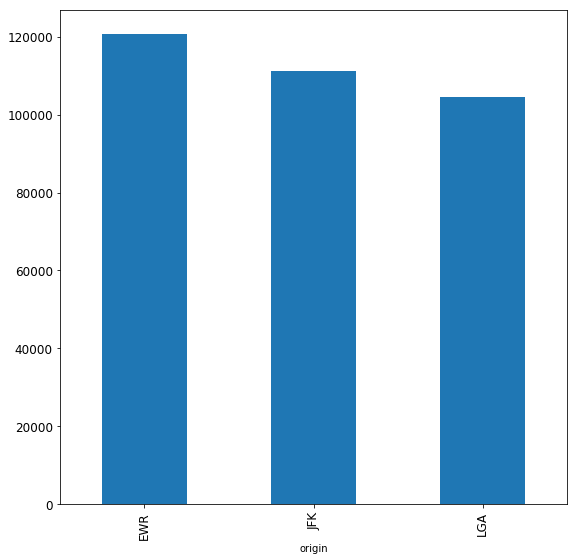

In [59]:
fig = plt.figure(figsize=[20, 20])
fig.add_subplot(222)
buzAir.plot(kind='bar', legend=False, fontsize=12)
plt.show()

In [28]:
busyAir['Number'].nlargest(2)

116    11262
165    10927
Name: Number, dtype: int64

In [57]:
busyAir.loc[116]

origin            JFK
CITY      Los Angeles
Number          11262
Name: 116, dtype: object

In [58]:
busyAir.loc[165]

origin        LGA
CITY      Chicago
Number      10927
Name: 165, dtype: object

#Los Angles & Chicago are the two most connected cities.